<a href="https://colab.research.google.com/github/betr0dalf/PZMS/blob/main/PZMS_NovikovDV_prac5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прикладные задачи математической статистики
# Практическая работа № 5
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

# Файл №1

## 1. Оценить коэффициент корреляции Пирсона 𝑟(𝑥, 𝑦) между двумя переменными в первом и втором столбце

In [ ]:
import numpy as np
import pandas as pd
import statistics as stat
from matplotlib import pyplot as plt
from scipy.stats import t, f
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
data_1 = pd.read_csv('1.txt', sep=',', header=None, names=['factor', 'result'])

x = data_1['factor']
y = data_1['result']

# По формуле
def count_r(x, y):
    Sx = np.sqrt(np.mean(x ** 2) - np.mean(x) ** 2)
    Sy = np.sqrt(np.mean(y ** 2) - np.mean(y) ** 2)
    r = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (Sx * Sy)
    return r

r = count_r(x, y)
print("Коэффициент корреляции Пирсона:", r.round(3))

Коэффициент корреляции Пирсона: 0.989


## 2. По шкале Чеддока оценить характеристику корреляционной связи между величинами

Корреляционная связь между факторной и результирующей переменными `весьма высокая`
(0.9 < **0.989** < 0.99)

## 3. Проверить статистическую значимость коэффициента корреляции Пирсона с помощью 𝑡-статистики

In [ ]:
n = len(data_1['factor'])

def chek_r(r, n):
    t_stat = abs(r) * np.sqrt ((n - 2) / (1 - r ** 2))

    # Определение критического значения t-статистики
    alpha = 0.05  # Уровень значимости
    df = n - 2  # Степени свободы
    critical_t = t.ppf(1 - alpha / 2, df)

    # Сравнение t-статистики с критическим значением
    print(f"t-статистика: {t_stat}")
    print(f"Критическое значение t-статистики: {critical_t}")

    if abs(t_stat) > critical_t:
        print("Коэффициент корреляции статистически значим.")
    else:
        print("Коэффициент корреляции не является статистически значим.")

chek_r(r, n)

t-статистика: 66.71457390601643
Критическое значение t-статистики: 1.984467454426692
Коэффициент корреляции статистически значим.


## 4. Построить линейную регрессию между столбцами, оценить значение коэффициентов линейной зависимости

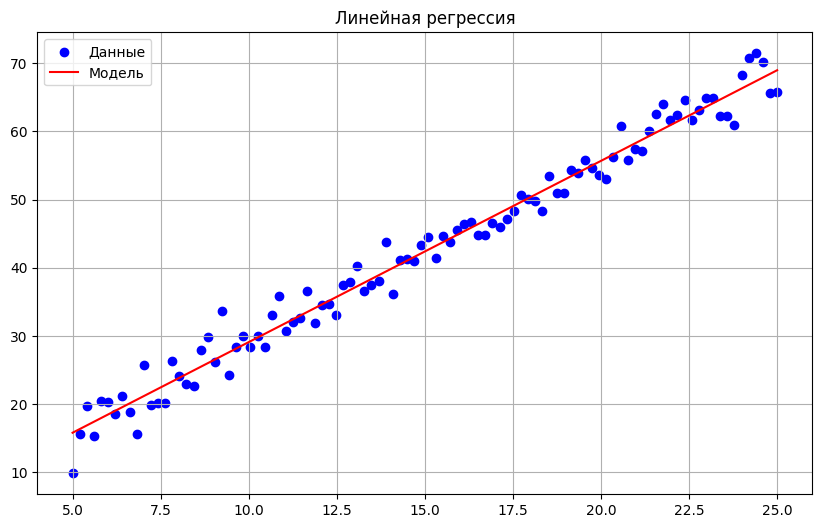

In [ ]:
def lin_model(x, y):
    # Вычисляем параметры a и b по формуле
    a = (sum(y) * sum(x ** 2) - sum(y * x) * sum(x)) / (n * sum(x ** 2) - sum(x) ** 2)
    b = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x ** 2) - sum(x) ** 2)

    y_pred = b * x + a

    return a, b, y_pred


a, b, y_pred = lin_model(x, y)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x, y_pred, color='red', label='Модель')
plt.title('Линейная регрессия')
plt.legend()
plt.grid()
plt.show()

## 5. Оценить адекватность модели с использованием критерия Фишера

In [ ]:
def check_ypred(y, y_pred, n):
    # Размерность вектора параметров
    d0 = 2

    # Дисперсия адекватности (величина среднего разброса)
    S_mod = sum((y - y_pred) ** 2) / (n - d0)
    # Общая дисперсия (оценивает несоответсвие между текущим знач и средним)
    S_ob = sum((y - np.mean(y)) ** 2) / (n - 1)

    S_min = min(S_mod, S_ob)
    S_max = max(S_mod, S_ob)
    F = S_max / S_min

    # Определение критического значения F-статистики
    alpha = 0.05        # Уровень значимости
    df_num = n - 2      # Степени свободы числителя
    df_den = n - 1      # Степени свободы знаменателя
    critical_f = f.ppf(1 - alpha, df_num, df_den)

    # Сравнение F-статистики с критическим значением
    print(f"F-статистика: {F}")
    print(f"Критическое значение F-статистики: {critical_f}")

    if F > critical_f:
        print("Модель статистически значима.")
    else:
        print("Модель не является статистически значимой.")
    return S_mod, S_ob


S_mod, S_ob = check_ypred(y, y_pred, n)

F-статистика: 45.9478219339492
Критическое значение F-статистики: 1.395025696640278
Модель статистически значима.


## 6. Оценить значимость полученных коэффициентов линейной регрессии

In [ ]:
def chek_ab(S_mod, S_ob, a, b, x, n):
    # Подсчет показателей для линейной регрессии
    m_a = (S_mod * np.sqrt(sum( x ** 2))) / (stat.stdev(x) * n)
    m_b = S_mod / (stat.stdev(x) * np.sqrt(n))

    # Подсчет T-статистик
    T_a = a / m_a
    T_b = b / m_b

    alpha = 0.05    # Уровень значимости
    df_t = n - 2    # Степени свободы

    # Критическое значение t-распределения
    t_critical = t.ppf(1 - alpha / 2, df_t)

    print(f"T_a: {T_a}")
    print(f"T_b: {T_b}")
    print(f"Критическое значение t-распределения: {t_critical}")

    if np.abs(T_a) > t_critical:
        print("Параметр a значим.")
    else:
        print("Параметр a не значим.")

    if np.abs(T_b) > t_critical:
        print("Параметр b значим.")
    else:
        print("Параметр b не значим.")
    return m_a, m_b, t_critical


m_a, m_b, t_critical = chek_ab(S_mod, S_ob, a, b, x, n)

T_a: 1.6944552500138024
T_b: 28.852102114764687
Критическое значение t-распределения: 1.984467454426692
Параметр a не значим.
Параметр b значим.


## 7. Построить доверительные интервалы для полученных коэффициентов

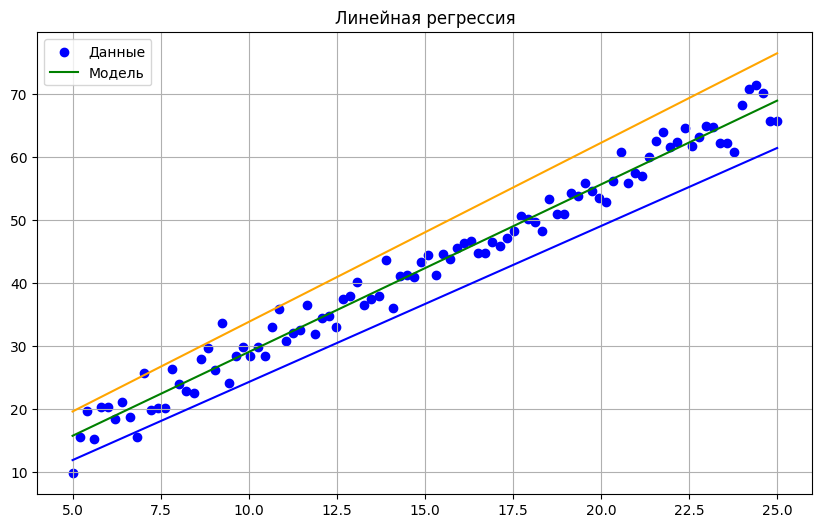

In [ ]:
#Доверительный интервал для параметра a
a_right = a - t_critical * m_a
a_left = a + t_critical * m_a

#Доверительный интервал для параметра b
b_right = b - t_critical * m_b
b_left = b + t_critical * m_b

y_right = a_right + b_right * x
y_left = a_left + b_left * x

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x, y_pred, color='green', label='Модель')
plt.plot(x, y_right, color='blue')
plt.plot(x, y_left, color='orange')
plt.title('Линейная регрессия')
plt.legend()
plt.grid()
plt.show()

## 8. Оценить интервал прогноза для линейной модели на 𝜟𝒙 = 3 значения вперед


In [ ]:
# Задаем параметры для предсказания
delta_x = 3  # На сколько шагов вперед делать предсказание
new_x = x[0] + delta_x  # Новый x для предсказания

# Предсказание y для нового значения x
y_hat = b * new_x + a

n = len(x)
alpha = 0.05

# Критическое значение t-распределения
t_val = t.ppf(1 - alpha / 2, df=n - 2)

# Вычисление предсказательного интервала
E = t_val * S_mod * np.sqrt(1 + 1/n + (new_x - np.mean(x)) ** 2 / (n * stat.stdev(x)))

# Нижняя и верхняя границы предсказательного интервала
lower_bound = y_hat - E
upper_bound = y_hat + E

# Вывод результата
print(f"Предсказанное значение y при 𝜟𝒙 = {delta_x} x = {x[0]}:\nx = {new_x} y = {y_hat}")
print(f"Предсказательный интервал: [{lower_bound}, {upper_bound}]")

Предсказанное значение y при 𝜟𝒙 = 3 x = 5.0:
x = 8.0 y = 23.782216369525077
Предсказательный интервал: [12.574283986306682, 34.99014875274347]


# Файл №2

## 1. C помощью теста Чоу обосновать необходимость деления выборки по одной из качественных факторных переменных. Произвести разбиение и построить две линейные регрессии, оценить коэффициенты моделей.

In [ ]:
df = pd.read_csv('2.txt', sep=',', header=None, names=['x', 'd1', 'd2', 'y'])


# Функция подсчета RSS
def count_RSS(y, y_pred):
    return sum((y - y_pred) ** 2)


# Разделение данных на подвыборки
set1 = df[(df['d1'] == 1)]
set2 = df[(df['d1'] == 0)]

# Модель для всей выборки
a, b, y_pred = lin_model(df['x'], df['y'])

# Модель для подвыборок
a1, b1, y_pred1 = lin_model(set1['x'], set1['y'])
a2, b2, y_pred2 = lin_model(set2['x'], set2['y'])


# Подсчет RSS
RSS = count_RSS(df['y'], y_pred)
RSS_1 = count_RSS(set1['y'], y_pred1)
RSS_2 = count_RSS(set2['y'], y_pred2)

k = 2
n = len(df['y'])
F = ((RSS - RSS_1 - RSS_2) / k) / ((RSS_1 + RSS_2) / (n - 2*k))

# Параметры
alpha = 0.05

# Критическое значение F-распределения
F_critical = f.ppf(1 - alpha, k, n - 2 * k)

# Сравнение F-статистики с критическим значением
print(f"F-статистика: {F}")
print(f"Критическое значение F-статистики: {F_critical}")

if F > F_critical:
    print("Деление по признаку d1 имеет смысл.")
else:
    print("Деление по признаку d1 не имеет смысл")

F-статистика: 19710.710703004035
Критическое значение F-статистики: 3.0419902345156493
Деление по признаку d1 имеет смысл.


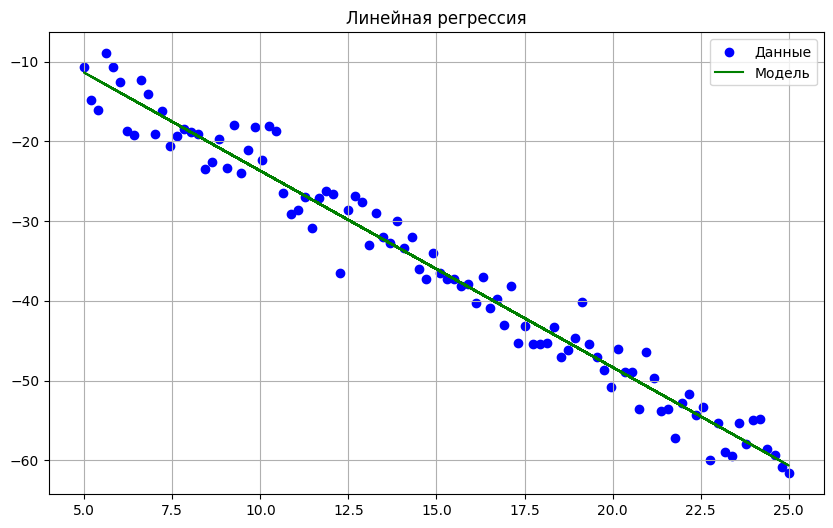

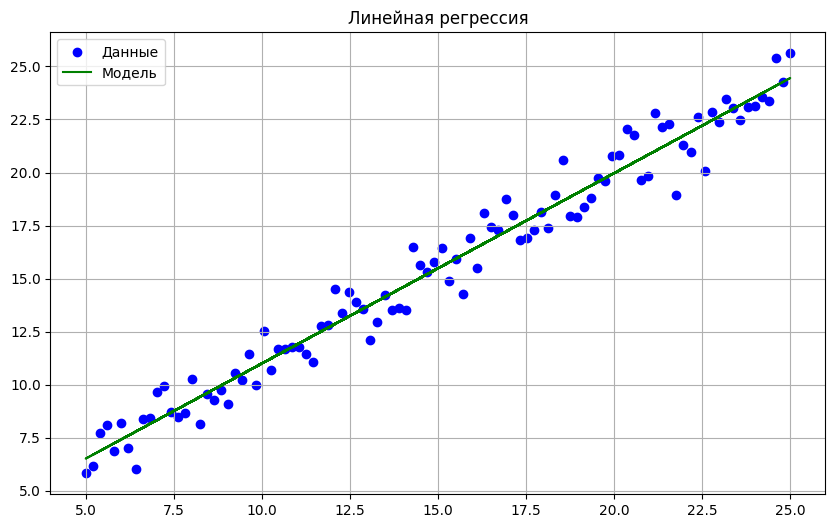

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(set1['x'], set1['y'], color='blue', label='Данные')
plt.plot(set1['x'], y_pred1, color='green', label='Модель')
plt.title('Линейная регрессия')
plt.legend()
plt.grid()
plt.show()
print()
plt.figure(figsize=(10, 6))
plt.scatter(set2['x'], set2['y'], color='blue', label='Данные')
plt.plot(set2['x'], y_pred2, color='green', label='Модель')
plt.title('Линейная регрессия')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Разделение данных на подвыборки
set1 = df[(df['d2'] == 1)]
set2 = df[(df['d2'] == 0)]

# Модель для всей выборки
a, b, y_pred = lin_model(df['x'], df['y'])

# Модель для подвыборок
a1, b1, y_pred1 = lin_model(set1['x'], set1['y'])
a2, b2, y_pred2 = lin_model(set2['x'], set2['y'])


# Подсчет RSS
RSS = count_RSS(df['y'], y_pred)
RSS_1 = count_RSS(set1['y'], y_pred1)
RSS_2 = count_RSS(set2['y'], y_pred2)

k = 2
n = len(df['y'])
F = ((RSS - RSS_1 - RSS_2) / k) / ((RSS_1 + RSS_2) / (n - 2 * k))

# Параметры
k = 2
n = len(df['y'])
alpha = 0.05

# Критическое значение F-распределения
F_critical = f.ppf(1 - alpha, k, n - 2 * k)

# Сравнение F-статистики с критическим значением
print(f"F-статистика: {F}")
print(f"Критическое значение F-статистики: {F_critical}")

if F > F_critical:
    print("Деление по признаку d2 имеет смысл.")
else:
    print("Деление по признаку d2 не имеет смысл")

F-статистика: 4.625566026265932
Критическое значение F-статистики: 3.0419902345156493
Деление по признаку d2 имеет смысл.


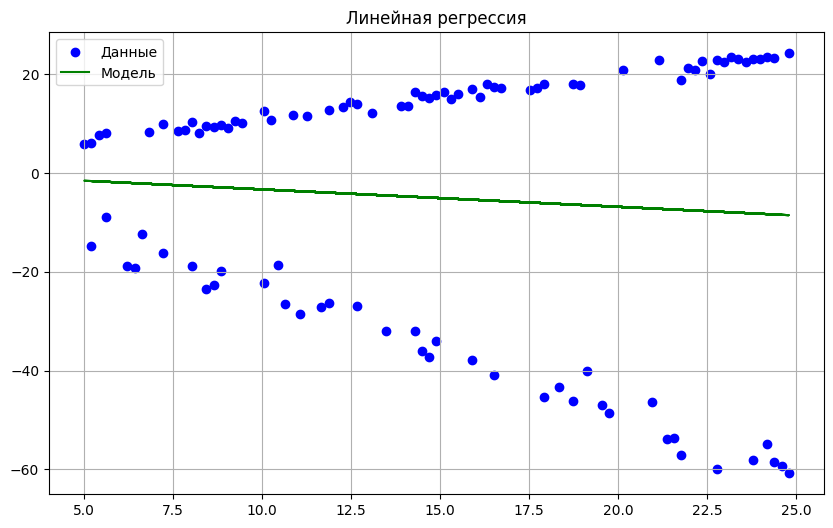

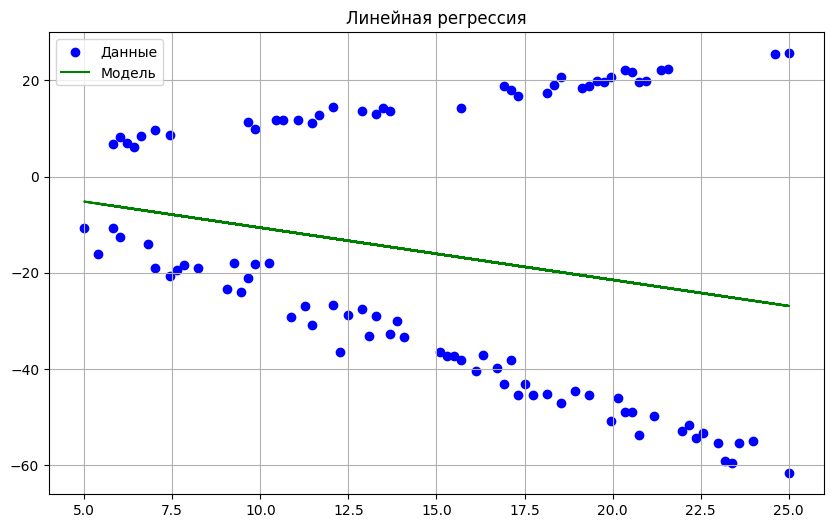

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(set1['x'], set1['y'], color='blue', label='Данные')
plt.plot(set1['x'], y_pred1, color='green', label='Модель')
plt.title('Линейная регрессия')
plt.legend()
plt.grid()
plt.show()
print()
plt.figure(figsize=(10, 6))
plt.scatter(set2['x'], set2['y'], color='blue', label='Данные')
plt.plot(set2['x'], y_pred2, color='green', label='Модель')
plt.title('Линейная регрессия')
plt.legend()
plt.grid()
plt.show()

# Файл №3

## 1. Построить линейную регрессию, оценить значения коэффициентов модели.



Коэффициент корреляции Пирсона:  -0.21302130521721907
t-статистика: 2.158342572918521
Критическое значение t-статистики: 1.984467454426692
Коэффициент корреляции статистически значим.



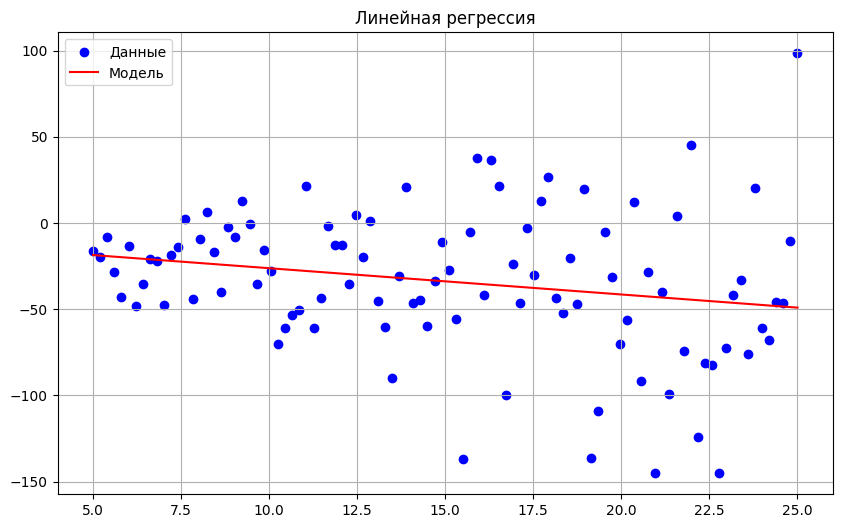

In [ ]:
df3= pd.read_csv('3.txt', sep=',', header=None, names=['x', 'y'])

R = count_r(df3['x'], df3['y'])
print('Коэффициент корреляции Пирсона: ', R)

n = len(df3['x'])
chek_r(R, n)

a, b, y_pred3 = lin_model(df3['x'], df3['y'])
print()

plt.figure(figsize=(10, 6))
plt.scatter(df3['x'], df3['y'], color='blue', label='Данные')
plt.plot(df3['x'], y_pred3, color='red', label='Модель')
plt.title('Линейная регрессия')
plt.legend()
plt.grid()
plt.show()

## 2. Оценить значимость полученных коэффициентов и адекватность модели.

In [ ]:
S_mod, S_ob = check_ypred(df3['y'], y_pred3, n)
print()
m_a, m_b, t_critical = chek_ab(S_mod, S_ob, a, b, df3['x'], n)

F-статистика: 1.0369539662835616
Критическое значение F-статистики: 1.395025696640278
Модель не является статистически значимой.

T_a: -0.023474956589941445
T_b: -0.05265563139640114
Критическое значение t-распределения: 1.984467454426692
Параметр a не значим.
Параметр b не значим.


## 3. Двумя способами (тест Спирмена и тест Гольдфельда-Квандта) определить, присутствует ли в данных гетероскедастичность.

In [ ]:
# Тест Спирмена
n = len(df3['x'])
df_final = pd.DataFrame(df3['x'], columns=['x'])
df_final['y'] = df3['y']
df_final['y_pred'] = y_pred3

# Шаг 1: Рассчитать остатки модели
df_final['e'] = np.abs(df_final['y'] - df_final['y_pred'])

# Шаг 2: Ранжировать переменные x и e
df_final['rank_x'] = df_final['x'].rank()  # ранжирование x
df_final['rank_e'] = df_final['e'].rank()  # ранжирование остатков

# Шаг 3: Рассчитать коэффициент ранговой корреляции Спирмена между ранжированными x и e
df_final['d'] = df_final['rank_e'] - df_final['rank_x']
df_final['d_squared'] = df_final['d'] ** 2

# Рассчет коэффициента Спирмена
n = len(df_final)
sum_d_squared = df_final['d_squared'].sum()
r_s = 1 - (6 * sum_d_squared) / (n * (n ** 2 - 1))
print(f"Коэффициент ранговой корреляции Спирмена r_s: {r_s}")

# Шаг 4: Рассчитать t-статистику для проверки значимости коэффициента Спирмена
t_s = r_s * np.sqrt((n - 2) / (1 - r_s ** 2))
print(f"t-статистика: {t_s}")

# Шаг 5: Определить критическое значение t-распределения
alpha = 0.05
df_t = n - 2  # степени свободы
t_critical = t.ppf(1 - alpha / 2, df_t)
print(f"Критическое значение t-распределения: {t_critical}")

# Проверка значимости t-статистики
if abs(t_s) > t_critical:
    print("Присутствует гетероскедастичность для заданной линейной зависимости.")
else:
    print("Не присутствует гетероскедастичность для заданной линейной зависимости.")

Коэффициент ранговой корреляции Спирмена r_s: 0.33762976297629765
t-статистика: 3.550875089071502
Критическое значение t-распределения: 1.984467454426692
Присутствует гетероскедастичность для заданной линейной зависимости.


In [ ]:
# Тест Гольдфельда-Квандта
n=len(df3['x'])
df_final = pd.DataFrame(df3['x'], columns=['x'])
df_final['y_pred'] = y_pred3
df_final['y'] = df3['y']

df_sort = df_final.sort_values(by='x', ascending=False)
m1 = df_sort.head(int(np.ceil(n * 3 / 8)))
m2 = df_sort.tail(int(np.ceil(n * 3 / 8)))

F = ((sum((m1['y_pred'] - m1['y']) ** 2)) / (len(m1['x']) - 1)) / ((sum((m2['y_pred'] - m2['y']) ** 2)) / (len(m2['x']) - 1))

# Параметры
alpha = 0.05

# Критическое значение F-распределения
F_critical = f.ppf(1 - alpha, len(m1['x']) - 1,  len(m2['x']) - 1)

# Сравнение F-статистики с критическим значением
print(f"F-статистика: {F}")
print(f"Критическое значение F-статистики: {F_critical}")

if F > F_critical:
    print("Присутствует гетероскедастичность для заданной линейной зависимости.")
else:
    print("Не присутствует гетероскедастичность для заданной линейной зависимости")

F-статистика: 5.7668813496590134
Критическое значение F-статистики: 1.7295070322048738
Присутствует гетероскедастичность для заданной линейной зависимости.
